In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime


In [2]:
db = sqlalchemy.engine.url.URL(drivername='mysql',
                               host='127.0.0.1',
                               database='sherman_1',
                               query={'read_default_file': '~/.my.cnf', 'charset': 'utf8'})
engine = sqlalchemy.create_engine(db)

In [3]:
df = pd.read_sql('''
    SELECT * FROM sherman_1.aware_device;
''' ,engine)

In [4]:
df['date'] = pd.to_datetime(df['timestamp'],unit='ms').dt.date

In [5]:
df = df[['device_id','date']]

In [6]:
def find_first_day(device_id, df_cleaned):
    df_target = df_cleaned[df_cleaned['device_id']==device_id]
    return min(df_target['date'])

In [7]:
first_day = {device_id: find_first_day(device_id, df)
             for device_id in set(df['device_id'].tolist())
             if find_first_day(device_id, df) >= datetime.date(year=2022, month=11, day=11)}


In [8]:
df = pd.DataFrame(first_day.items(),columns=['device_id', 'date'])
df

,device_id,date
0,780c9b18-72d3-4714-858d-3c91b3719155,2022-12-16
1,dff9a20d-f314-4901-8adc-fa91b6e2c5b8,2022-12-05
2,33fcced4-82c8-42a3-ae2d-cdfdc365f7e2,2022-12-02
3,bf244d2f-5edd-4000-80f4-084c7951ece9,2022-12-06
4,160d7b33-a74f-438d-af2a-445ecd8c4ff1,2022-12-14
...,...,...
73,631788ed-6d66-4c1c-8b18-c2d320fd3043,2022-12-07
74,41646f47-46d6-4ea7-90fd-0b6afaea3d64,2022-11-23
75,d565193f-df85-4012-a747-0e415cf60f37,2022-12-14
76,55b49a7e-8ffe-4f91-af32-8101398db6e9,2022-12-05


In [9]:
grouped = df.groupby('date')['device_id'].nunique()
m = grouped.mean()
print(m)

3.391304347826087


In [10]:
df['date']

0     2022-12-16
1     2022-12-05
2     2022-12-02
3     2022-12-06
4     2022-12-14
         ...    
73    2022-12-07
74    2022-11-23
75    2022-12-14
76    2022-12-05
77    2022-12-13
Name: date, Length: 78, dtype: object

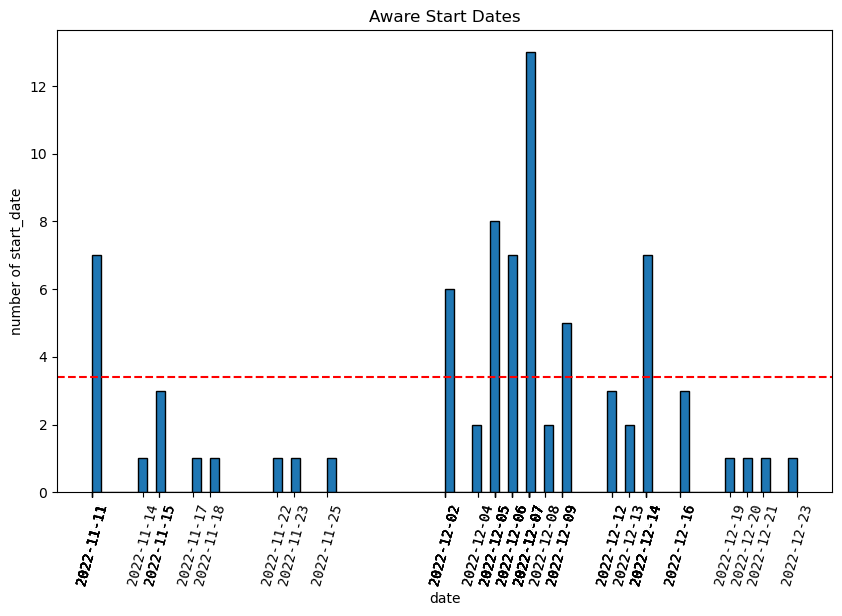

In [12]:
mylist = df['date']
fig = plt.figure(figsize=(10, 6))
plt.hist(mylist,bins=len(mylist),edgecolor='black')
plt.xlabel('date')
plt.ylabel('number of start_date')
plt.title('Aware Start Dates')
plt.xticks(mylist,rotation=75,fontsize=10, fontweight='light', fontfamily='monospace')
plt.axhline(y=m, color='red', linestyle='--')
plt.show()